In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data file
heartdata_path = "data/heart_statlog_cleveland_hungary_final.csv"

# Read heart disease data
heartdata_df = pd.read_csv(heartdata_path)

# Combine the data into a single dataset
# study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
heartdata_df

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]

In [16]:
# Checking the number of subjects.
len(heartdata_df)

1190

In [17]:
heartdata_df.loc[(heartdata_df.sex == 1),'sex']='male'
heartdata_df.loc[(heartdata_df.sex == 0),'sex']='female'
heartdata_df

age     sex  chest pain type  resting bp s  cholesterol  \
0      40    male                2           140          289   
1      49  female                3           160          180   
2      37    male                2           130          283   
3      48  female                4           138          214   
4      54    male                3           150          195   
...   ...     ...              ...           ...          ...   
1185   45    male                1           110          264   
1186   68    male                4           144          193   
1187   57    male                4           130          131   
1188   57  female                2           130          236   
1189   38    male                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

means = heartdata_df.groupby('sex').mean()['age']
medians = heartdata_df.groupby('sex').median()['age']
variances = heartdata_df.groupby('sex').var()['age']
summary_table = pd.DataFrame({"Mean Subject Age":means,
                              "Median Suject Age":medians,
                              "Subject Age Variance":variances})
summary_table

Mean Subject Age  Median Suject Age  Subject Age Variance
sex                                                              
female         53.466192                 54             92.821174
male           53.798680                 55             86.028809

In [25]:
heartdata_df['sex'].value_counts()

male      909
female    281
Name: sex, dtype: int64

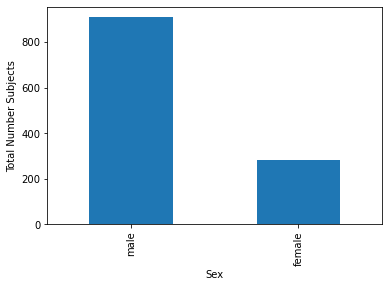

In [27]:
# Generate a bar plot showing the total number of subjects for each sex.
counts = heartdata_df['sex'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Sex")
plt.xticks(rotation=90)
plt.ylabel("Total Number Subjects")
plt.show()

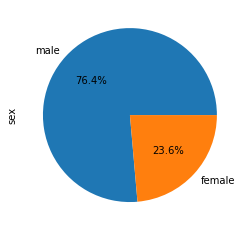

In [28]:
# Generate a pie plot showing the distribution of female versus male subjects using pandas
counts = heartdata_df.sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()